In [1]:
import numpy as np
import pandas as pd

In [2]:
url = ("http://hbiostat.org/data/repo/titanic3.xls")

df = pd.read_excel(url)
orig_df = df

### Inspect and Clean Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.shape

(1309, 14)

In [5]:
df.describe().iloc[:,:2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# To get percentage of missing values in a column
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [8]:
df.isnull().sum(axis=1).loc[:20]

0     1
1     1
2     2
3     1
4     2
5     1
6     1
7     2
8     1
9     2
10    1
11    1
12    1
13    3
14    1
15    4
16    2
17    1
18    2
19    1
20    1
dtype: int64

In [9]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
mask = df.isnull().any(axis=1)
mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [11]:
df[mask].body.head()

0      NaN
1      NaN
2      NaN
3    135.0
4      NaN
Name: body, dtype: float64

In [12]:
df.sex.value_counts(dropna=False)

sex
male      843
female    466
Name: count, dtype: int64

In [13]:
df.embarked.value_counts(dropna=False)

embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

### Create Features

In [14]:
name = df.name

In [15]:
name.head(3)

0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object

In [16]:
df = df.drop(columns=["name",
                      "ticket",
                      "home.dest",
                      "boat",
                      "body",
                      "cabin"])


In [17]:
df = pd.get_dummies(df, drop_first=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1046 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1308 non-null   float64
 6   sex_male    1309 non-null   bool   
 7   embarked_Q  1309 non-null   bool   
 8   embarked_S  1309 non-null   bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 65.3 KB


In [19]:
df['sex_male'] = df['sex_male'].astype('int64')
df['embarked_Q'] = df['embarked_Q'].astype('int64')
df['embarked_S'] = df['embarked_S'].astype('int64')

### Split Data

In [20]:
y = df.survived
X = df.drop(["survived"], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.isnull().sum()

pclass          0
age           187
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

In [24]:
X_train.embarked_S.unique()

array([1, 0], dtype=int64)

### Impute Data

In [25]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer


In [26]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age", "fare"]
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

In [27]:
X_train.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [28]:
X_test.isnull().sum()

pclass         0
age           76
sibsp          0
parch          0
fare           0
sex_male       0
embarked_Q     0
embarked_S     0
dtype: int64

In [29]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age"]
X_test[cols_to_impute] = imp_mode.fit_transform(X_test[cols_to_impute])

In [30]:
X_test.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

### Normalize Data

In [31]:
X_train.embarked_S.unique()

array([1, 0], dtype=int64)

In [32]:
X_train

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1214,3,28.0,0,0,8.6625,1,0,1
677,3,26.0,0,0,7.8958,1,0,1
534,2,19.0,0,0,26.0000,0,0,1
1174,3,28.0,8,2,69.5500,0,0,1
864,3,28.0,0,0,7.7750,0,0,1
...,...,...,...,...,...,...,...,...
1095,3,28.0,0,0,7.6292,0,1,0
1130,3,18.0,0,0,7.7750,0,0,1
1294,3,28.5,0,0,16.1000,1,0,1
860,3,26.0,0,0,7.9250,0,0,1


In [33]:
# To be used for data scaling (normalizing)
from sklearn.preprocessing import StandardScaler

In [34]:
# easier way of building out a list when you have a lot of values/columns to add 
cols = "pclass,age,sibsp,fare".split(",")
#cols = X_train.columns
cols

['pclass', 'age', 'sibsp', 'fare']

In [35]:
sca = StandardScaler()
sca.fit(X_train[cols])
X_train[cols] = sca.transform(X_train[cols])

sca.fit(X_test[cols])
X_test[cols] = sca.transform(X_test[cols])

In [36]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1214,0.825248,-0.070918,-0.498616,0,-0.474092,1,0,1
677,0.825248,-0.232596,-0.498616,0,-0.488616,1,0,1
534,-0.363317,-0.798468,-0.498616,0,-0.145647,0,0,1
1174,0.825248,-0.070918,6.897852,2,0.679370,0,0,1
864,0.825248,-0.070918,-0.498616,0,-0.490904,0,0,1


In [37]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1214 to 513
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   float64
 1   age         1309 non-null   float64
 2   sibsp       1309 non-null   float64
 3   parch       1309 non-null   int64  
 4   fare        1309 non-null   float64
 5   sex_male    1309 non-null   int64  
 6   embarked_Q  1309 non-null   int64  
 7   embarked_S  1309 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 92.0 KB


### Summary Stats

In [39]:
X.describe().iloc[:,[0,-1]]

,pclass,embarked_S
count,1.309000e+03,1309.000000
mean,-8.549311e-17,0.698243
std,1.000382e+00,0.459196
min,-1.551881e+00,0.000000
25%,-3.633166e-01,0.000000
50%,8.252478e-01,1.000000
75%,8.252478e-01,1.000000
max,8.820212e-01,1.000000


In [40]:
X.iloc[[1,4], -3:]

,sex_male,embarked_Q,embarked_S
677,1,0,1
864,0,0,1


In [41]:
X.loc[[677,864], "sex_male":]

,sex_male,embarked_Q,embarked_S
677,1,0,1
864,0,0,1


### Histogram

<Axes: ylabel='Frequency'>

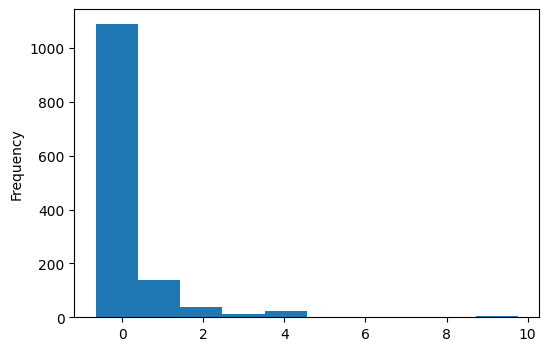

In [42]:
import matplotlib.pyplot as plt
flg, ax = plt.subplots(figsize=(6,4))
X["fare"].plot(kind="hist", ax=ax)

C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1200x800 with 0 Axes>

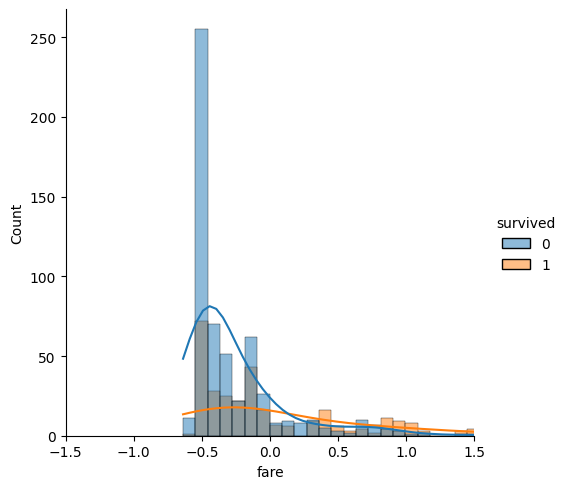

In [43]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.displot(X_train, x = "fare", hue = y_train, kde=True)
plt.xlim(-1.5, 1.5)
plt.show()

### Scatter Plot

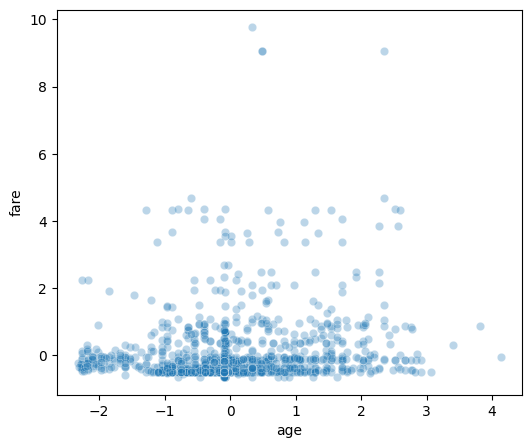

In [44]:
plt.figure(figsize=(6,5))
sns.scatterplot(X, x="age", y="fare", alpha=0.3)
plt.show()

In [45]:
X.age.corr(X.fare)

0.17637508635663304

### Joint Plot

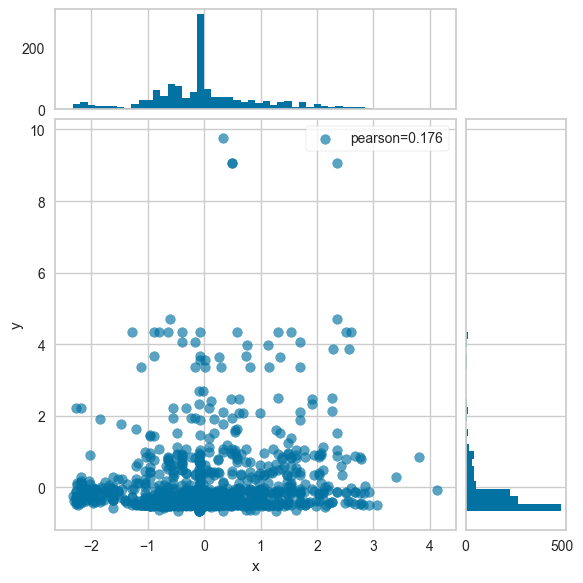

<Axes: xlabel='x', ylabel='y'>

In [46]:
from yellowbrick.features import JointPlotVisualizer

fig, ax = plt.subplots(figsize=(6,6))
jpv = JointPlotVisualizer(feature="age",target="fare")
jpv.fit(X["age"], X["fare"])
jpv.poof()

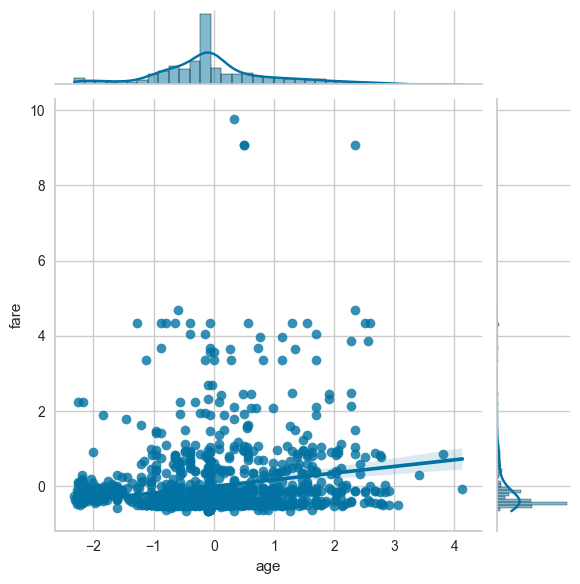

In [47]:
new_df = X.copy()
new_df["target"] = y
p = sns.jointplot(data=new_df, x="age", y="fare", kind="reg")


### Pair Grid

C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


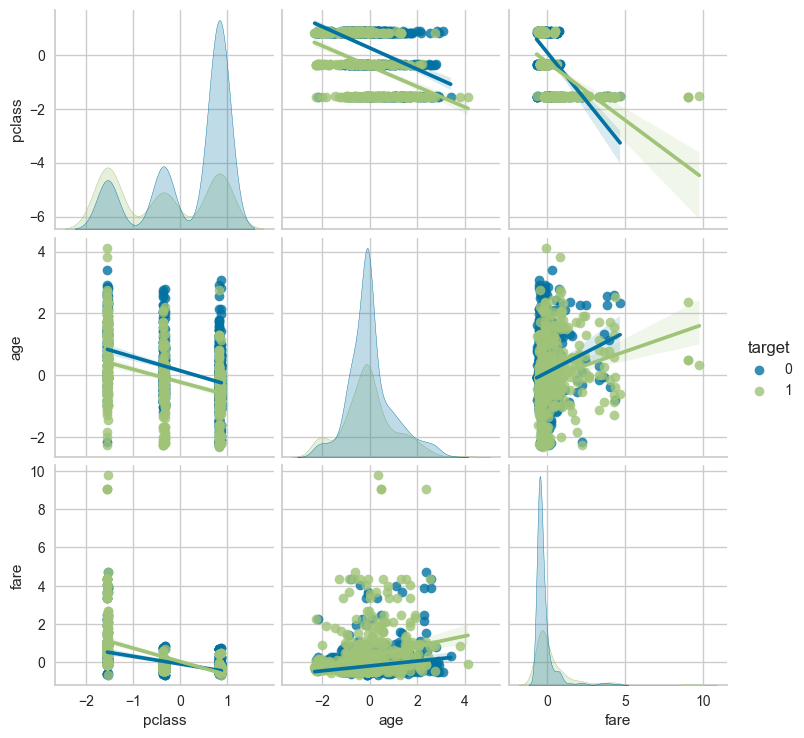

In [48]:
new_df = X.copy()
new_df["target"] = y
vars = ["pclass","age","fare"]
p = sns.pairplot(new_df, vars=vars, hue="target", kind="reg")

### Box and Violin Plots

C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='target', ylabel='age'>

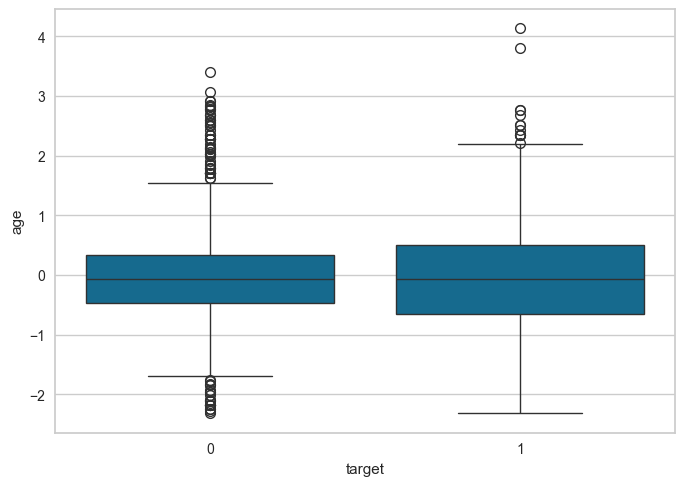

In [49]:
new_df = X.copy()
new_df["target"] = y
sns.boxplot(x="target", y="age", data=new_df)

C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='target', ylabel='sex_male'>

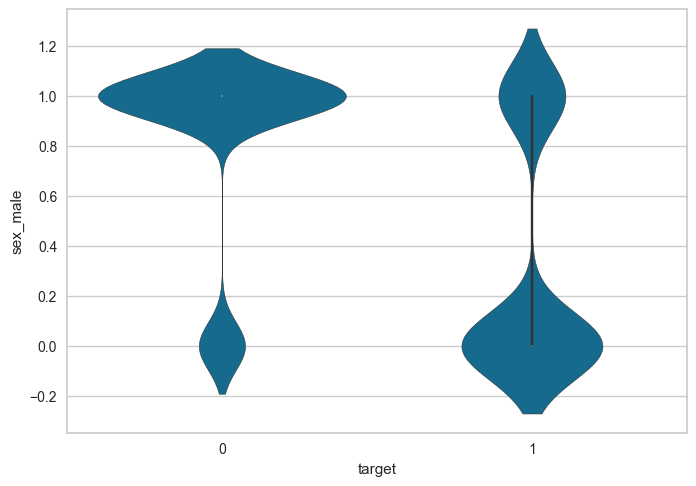

In [50]:
sns.violinplot(x="target", y="sex_male", data = new_df)

### Comparing Two Ordinal Values

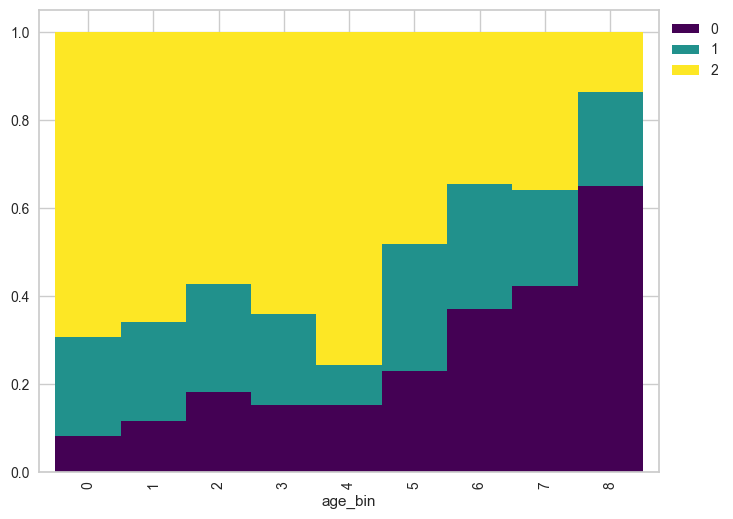

In [51]:
#### STUDY THIS ONE AGAIN ####

fig, ax = plt.subplots(figsize=(8,6))
(
    X.assign(
        age_bin = pd.qcut(X.age, q=10, labels=False, duplicates='drop'),
        class_bin = pd.cut(X.pclass, bins=3, labels=False, duplicates='drop')
    )
    .groupby(["age_bin", "class_bin"])
    .size()
    .unstack()
    .pipe(lambda df: df.div(df.sum(1), axis=0))
    .plot.bar(stacked=True,
              width=1,
              ax=ax,
              cmap="viridis")
    .legend(bbox_to_anchor = (1,1))
)


### Correlation

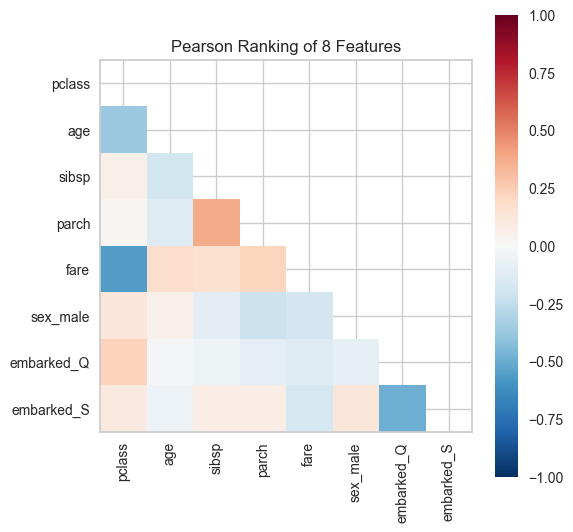

<Axes: title={'center': 'Pearson Ranking of 8 Features'}>

In [52]:
from yellowbrick.features import Rank2D
fig, ax = plt.subplots(figsize=(6,6))
pcv = Rank2D(features = X.columns, algorithm="pearson")
pcv.fit(X,y)
pcv.transform(X)
pcv.poof()

<Axes: >

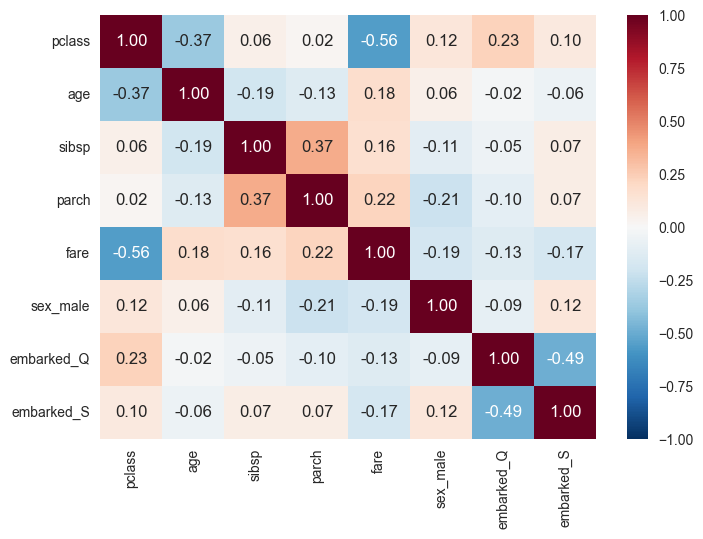

In [53]:
sns.heatmap(X.corr(), fmt=".2f", annot=True, cmap="RdBu_r", vmin=-1, vmax=1)

In [54]:
X.corr().iloc[:, :2]

,pclass,age
pclass,1.000000,-0.373127
age,-0.373127,1.000000
sibsp,0.059722,-0.188248
parch,0.018029,-0.130892
fare,-0.559474,0.176375
sex_male,0.124590,0.055892
embarked_Q,0.230062,-0.023242
embarked_S,0.096506,-0.056296


In [55]:
def correlated_columns(df, threshold=0.5):
    return (df.corr()
           .pipe(lambda df1: pd.DataFrame(np.tril(df1, k=-1),
                                         columns=df.columns,
                                         index=df.columns))
            .stack()
            .rename("pearson")
            .pipe(lambda s: s[s.abs()> threshold].reset_index())
            .query("level_0 not in level_1")
           )

correlated_columns(X)

,level_0,level_1,pearson
0,fare,pclass,-0.559474


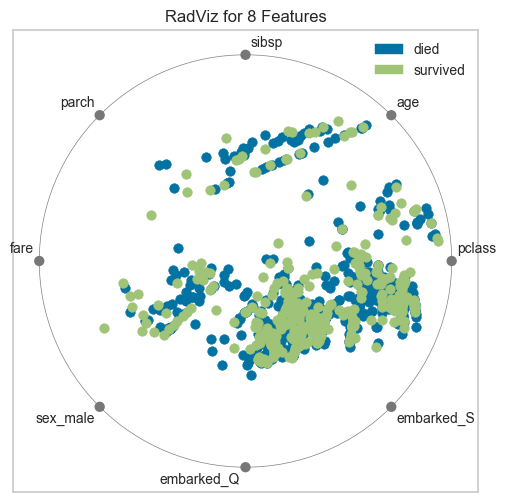

<Axes: title={'center': 'RadViz for 8 Features'}>

In [56]:
from yellowbrick.features import RadViz
fig, ax = plt.subplots(figsize=(6,6))
rv = RadViz(
        classes=["died","survived"],
        features = X.columns)
rv.fit(X,y)
_ = rv.transform(X)
rv.poof()

<Axes: >

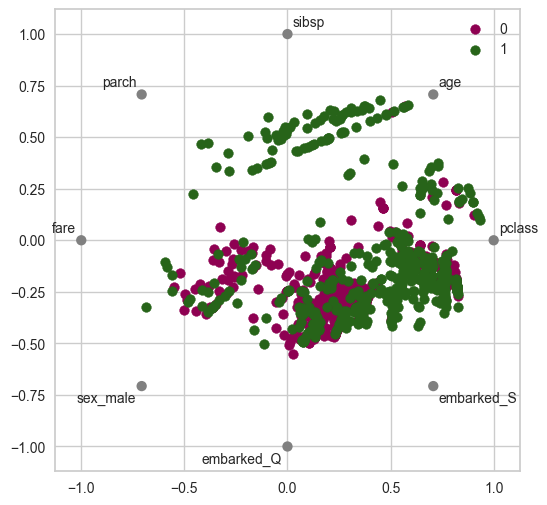

In [58]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(6,6))
new_df = X.copy()
new_df["target"]=y
radviz(new_df, "target", ax=ax, colormap = "PiYG")

### Parallel Coordinates 

C:\Users\timry\AppData\Local\Temp\ipykernel_14888\2720170248.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


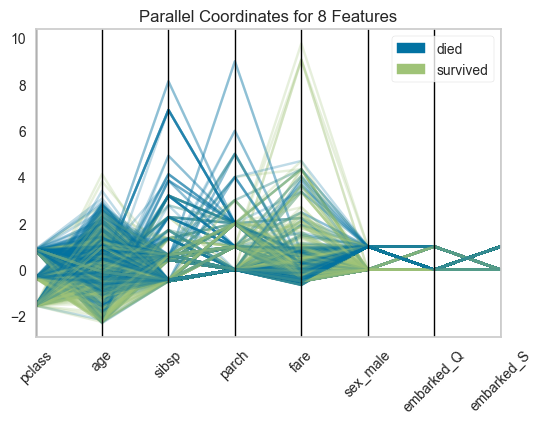

<Axes: title={'center': 'Parallel Coordinates for 8 Features'}>

In [59]:
from yellowbrick.features import ParallelCoordinates

fig, ax = plt.subplots(figsize=(6,4))
pc = ParallelCoordinates(
        classes=["died","survived"],
        features=X.columns)
pc.fit(X,y)
pc.transform(X)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
pc.poof()

[Text(0, 0, 'pclass'),
 Text(1, 0, 'age'),
 Text(2, 0, 'sibsp'),
 Text(3, 0, 'parch'),
 Text(4, 0, 'fare'),
 Text(5, 0, 'sex_male'),
 Text(6, 0, 'embarked_Q'),
 Text(7, 0, 'embarked_S')]

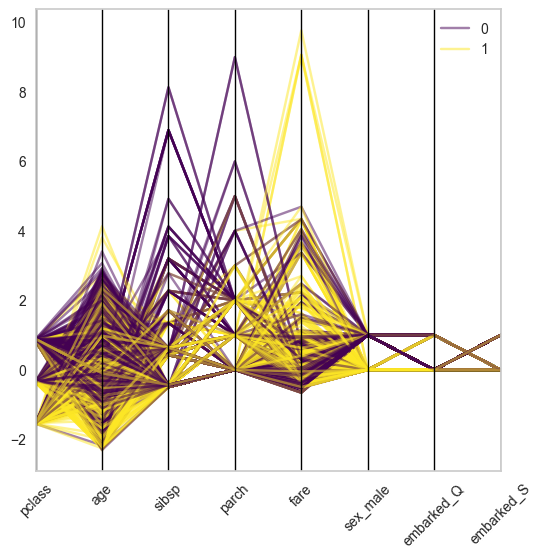

In [62]:
from pandas.plotting import parallel_coordinates
fig, ax = plt.subplots(figsize=(6,6))
new_df = X.copy()
new_df["target"]=y
parallel_coordinates(new_df, "target", ax=ax, colormap = "viridis", alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)